In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [48]:
# Load the unemployment data from a CSV file
df = pd.read_csv('unemployment in India.csv')

In [51]:
# Display the first few rows of the dataset
#print(df.head())
df.sample(4)

,Region,Date,Frequency,Unemployment Rate,Estimated Employed,Labor Force,Area,Year,Day,Month
11,Andhra Pradesh,30-04-2020,Monthly,16.29,8792827.0,36.03,Rural,2020.0,30.0,4.0
65,Delhi,30-04-2020,Monthly,20.69,115487.0,30.21,Rural,2020.0,30.0,4.0
530,Jharkhand,30-04-2020,Monthly,61.48,1054829.0,39.92,Urban,2020.0,30.0,4.0
72,Goa,30-09-2019,Monthly,3.61,163215.0,35.78,Rural,2019.0,30.0,9.0


In [4]:
# Check for missing values
print(df.isnull().sum())

Region                 14
Date                   14
 Frequency             14
Unemployment Rate      14
 Estimated Employed    14
Labor Force            14
Area                   14
Year                   14
Day                    14
Month                  14
dtype: int64


In [5]:
df[' Frequency'].value_counts()

Monthly     381
 Monthly    359
Name:  Frequency, dtype: int64

In [6]:
print(df['Region'].value_counts())

Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: Region, dtype: int64


In [7]:
df.isnull().sum()

Region                 14
Date                   14
 Frequency             14
Unemployment Rate      14
 Estimated Employed    14
Labor Force            14
Area                   14
Year                   14
Day                    14
Month                  14
dtype: int64

In [8]:
df.duplicated().sum()

13

In [9]:
# If there are missing values, handle them (e.g., by filling or dropping)
df.fillna(method='ffill', inplace=True)  # Forward fill missing values

In [10]:
print('row count =>',df.shape[0])
print('column count =>',df.shape[1])

row count => 754
column count => 10


In [52]:
# Convert the 'Year' column to datetime if it's in string format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')  # Adjust if it's in a different format
# Check the data types of the columns
print(df.dtypes)

Region                         object
Date                           object
 Frequency                     object
Unemployment Rate             float64
 Estimated Employed           float64
Labor Force                   float64
Area                           object
Year                   datetime64[ns]
Day                           float64
Month                         float64
dtype: object


In [12]:
# Summary statistics
print(df.describe())

       Unemployment Rate   Estimated Employed  Labor Force         Day  \
count         754.000000         7.540000e+02   754.000000  754.000000   
mean           11.660796         7.464805e+06    42.589456   30.493369   
std            10.661370         8.233269e+06     8.040783    0.625346   
min             0.000000         4.942000e+04    13.330000   29.000000   
25%             4.692500         1.227446e+06    38.167500   30.000000   
50%             8.135000         4.825595e+06    41.035000   31.000000   
75%            15.720000         1.152000e+07    45.390000   31.000000   
max            76.740000         4.577751e+07    72.570000   31.000000   

            Month  
count  754.000000  
mean     6.383289  
std      3.205289  
min      1.000000  
25%      4.000000  
50%      6.000000  
75%      9.000000  
max     12.000000  


In [13]:
df[["Day", "Month", "Year"]] = df['Date'].str.split("-", expand = True)
df

,Region,Date,Frequency,Unemployment Rate,Estimated Employed,Labor Force,Area,Year,Day,Month
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,2019,31,05
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural,2019,30,06
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural,2019,31,07
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural,2019,31,08
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural,2019,30,09
...,...,...,...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban,2020,29,02
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban,2020,31,03
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban,2020,30,04
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban,2020,31,05


In [14]:
df.drop(columns=[' Frequency'],axis=1,inplace=True)

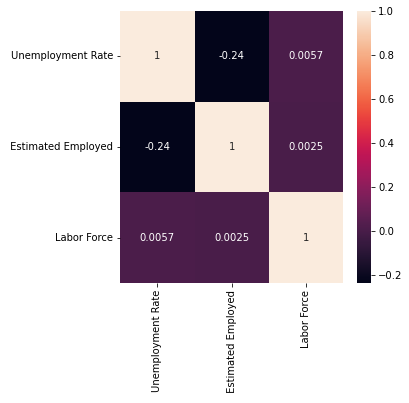

In [15]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

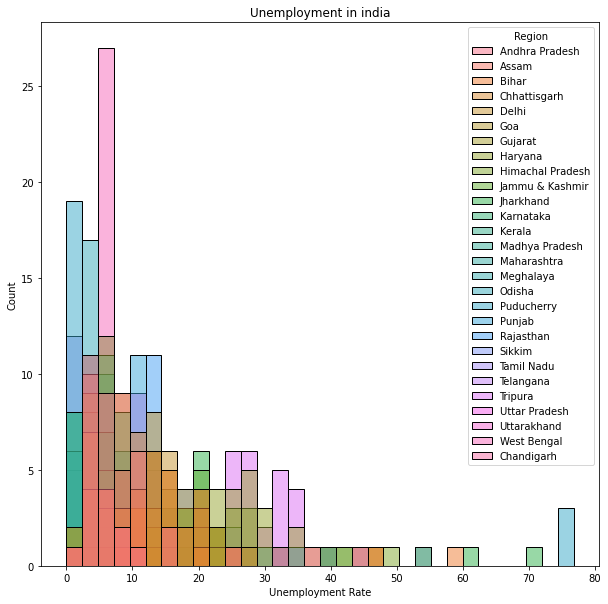

In [16]:
plt.figure(figsize=(10,10))
plt.title("Unemployment in india")
sns.histplot(x='Unemployment Rate',hue= "Region", data=df,kde=False)
plt.show()

In [18]:
df.Month.unique()

array(['05', '06', '07', '08', '09', '10', '11', '12', '01', '02', '03',
       '04'], dtype=object)

<AxesSubplot:xlabel='Month', ylabel='Unemployment Rate'>

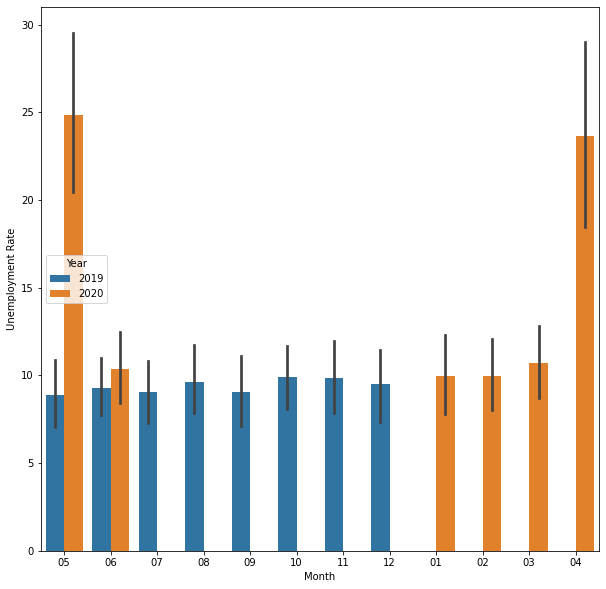

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='Month',y='Unemployment Rate',hue='Year',data=df)

In [21]:
df.Day.unique()

array([' 31', ' 30', ' 29'], dtype=object)

<AxesSubplot:xlabel='Day', ylabel='Unemployment Rate'>

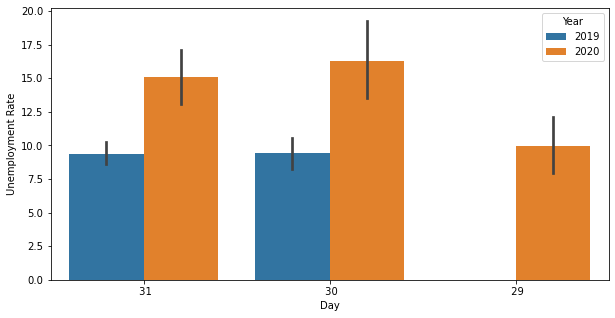

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(x='Day',y='Unemployment Rate',hue='Year',data=df)

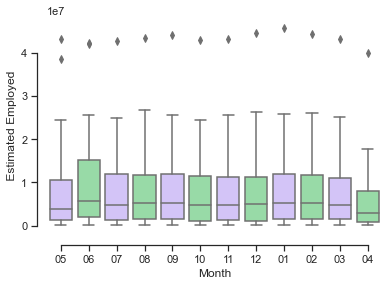

In [23]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Month", y=' Estimated Employed', palette=["m", "g"],
            data=df)
sns.despine(offset=10, trim=True)

In [24]:
df.drop('Year',axis=1)

,Region,Date,Unemployment Rate,Estimated Employed,Labor Force,Area,Day,Month
0,Andhra Pradesh,31-05-2019,3.65,11999139.0,43.24,Rural,31,05
1,Andhra Pradesh,30-06-2019,3.05,11755881.0,42.05,Rural,30,06
2,Andhra Pradesh,31-07-2019,3.75,12086707.0,43.50,Rural,31,07
3,Andhra Pradesh,31-08-2019,3.32,12285693.0,43.97,Rural,31,08
4,Andhra Pradesh,30-09-2019,5.17,12256762.0,44.68,Rural,30,09
...,...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,7.55,10871168.0,44.09,Urban,29,02
750,West Bengal,31-03-2020,6.67,10806105.0,43.34,Urban,31,03
751,West Bengal,30-04-2020,15.63,9299466.0,41.20,Urban,30,04
752,West Bengal,31-05-2020,15.22,9240903.0,40.67,Urban,31,05


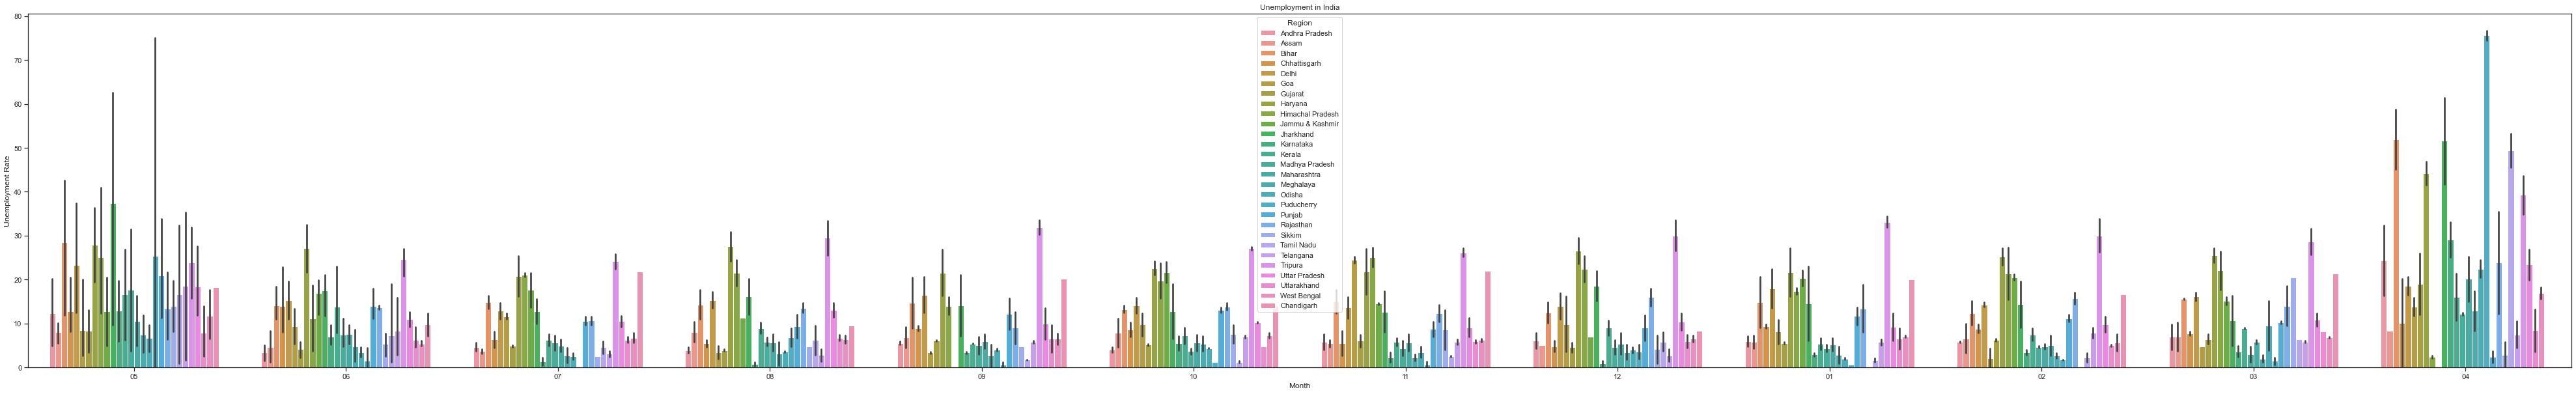

In [25]:
plt.figure(figsize=(70,10))
plt.title("Unemployment in India")
sns.barplot(x='Month',y ='Unemployment Rate',hue='Region', data=df)
plt.show()

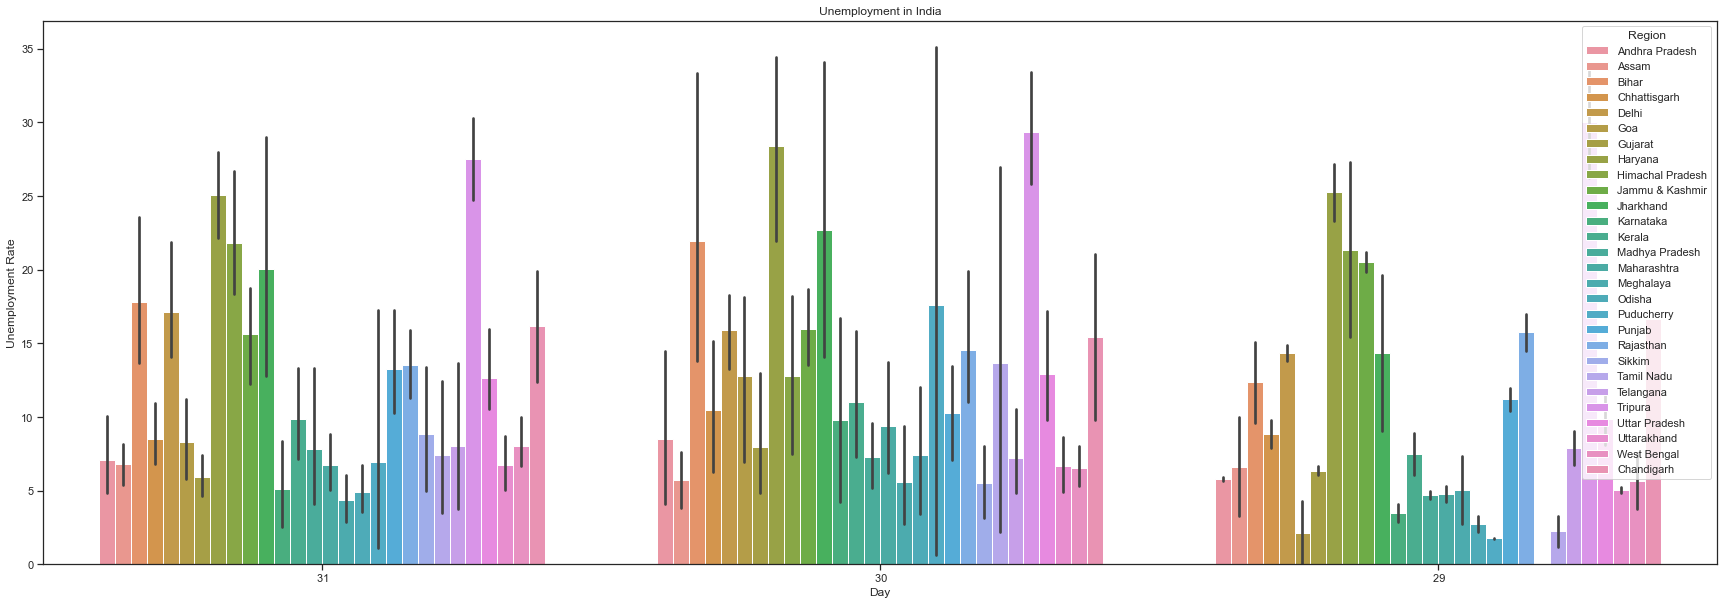

In [26]:
plt.figure(figsize=(30,10))
plt.title("Unemployment in India")
sns.barplot(x='Day',y ='Unemployment Rate',hue='Region', data=df)
plt.show()

In [46]:
unemploment = df[["Region",'Unemployment Rate']]
figure = px.sunburst(unemploment, path=["Region"], 
                     values='Unemployment Rate',
                     width=700, height=700, 
                     title="Unemployment Rate in India")
figure.show() 

In [44]:
unemploment = df[["Region",' Estimated Employed']]
figure = px.sunburst(unemploment, path=["Region"], 
                     values=' Estimated Employed',
                     width=700, height=700, 
                     title="Employment Rate in India")
figure.show()